# 0. 코딩 준비
- 참조 document :  https://web.mit.edu/music21/doc/index.html
- 참조 예제 : https://bit.ly/2HQ9Q4J
- 참조 데이터 : https://tykimos.github.io/2017/04/09/RNN_Layer_Talk/
- 악보 처리용 프로그램 추가 :https://musescore.org  (MuseScore3인스톨)
- 악보를 보기 위한 setting :
- us=music21.environment.UserSettings()
- us["musescoreDirectPNGPath"]="C:/Program Files/MuseScore 3/bin/MuseScore3.exe"
- pip install music21

In [1]:
import numpy as np
import music21
import tensorflow as tf
import tensorflow.keras.utils as utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import os

# 1. 데이터 준비하기

# 시퀀스 데이터 정의

In [2]:
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

print("length of seq: ",len(seq))

length of seq:  54


In [3]:
print(seq)

['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [4]:
note_seq = " ".join(seq)
print(note_seq)
m = music21.converter.parse("2/4"+note_seq, format="tinyNotation")
m.show('midi')

g8 e8 e4 f8 d8 d4 c8 d8 e8 f8 g8 g8 g4 g8 e8 e8 e8 f8 d8 d4 c8 e8 g8 g8 e8 e8 e4 d8 d8 d8 d8 d8 e8 f4 e8 e8 e8 e8 e8 f8 g4 g8 e8 e4 f8 d8 d4 c8 e8 g8 g8 e8 e8 e4


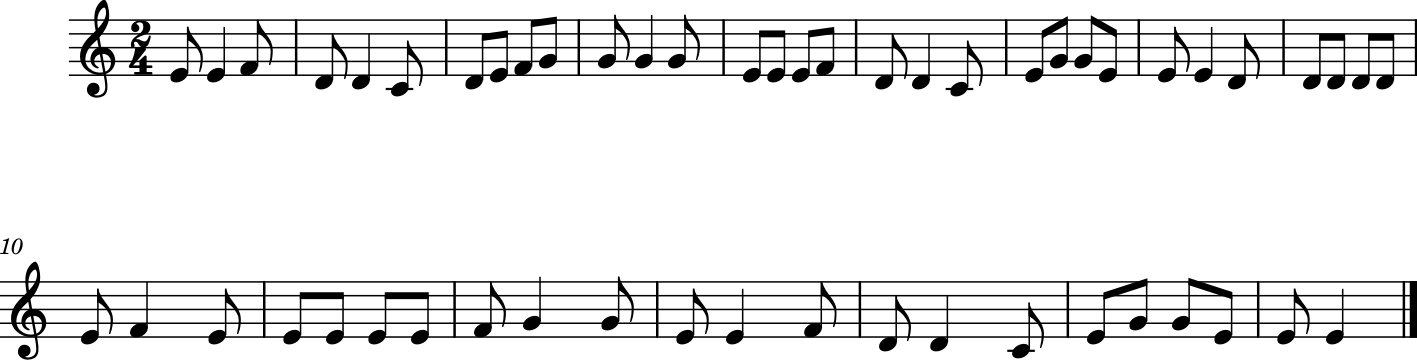

In [6]:
us=music21.environment.UserSettings()
us["musescoreDirectPNGPath"]="C:/Program Files/MuseScore 3/bin/MuseScore3.exe"
m.show()

# 코드 사전 정의

In [7]:
note_seq

'g8 e8 e4 f8 d8 d4 c8 d8 e8 f8 g8 g8 g4 g8 e8 e8 e8 f8 d8 d4 c8 e8 g8 g8 e8 e8 e4 d8 d8 d8 d8 d8 e8 f4 e8 e8 e8 e8 e8 f8 g4 g8 e8 e4 f8 d8 d4 c8 e8 g8 g8 e8 e8 e4'

In [8]:
from keras_preprocessing.text import Tokenizer
t = Tokenizer()
t.fit_on_texts([seq])
encoded = t.texts_to_sequences([seq])[0]
print(encoded)
print(t.word_index)

[2, 1, 5, 4, 3, 6, 7, 3, 1, 4, 2, 2, 8, 2, 1, 1, 1, 4, 3, 6, 7, 1, 2, 2, 1, 1, 5, 3, 3, 3, 3, 3, 1, 9, 1, 1, 1, 1, 1, 4, 8, 2, 1, 5, 4, 3, 6, 7, 1, 2, 2, 1, 1, 5]
{'e8': 1, 'g8': 2, 'd8': 3, 'f8': 4, 'e4': 5, 'd4': 6, 'c8': 7, 'g4': 8, 'f4': 9}


In [9]:
code2idx = {'c4': 0, 'd4': 1, 'e4': 2, 'f4': 3, 'g4': 4, 'a4': 5, 'b4': 6,
            'c8': 7, 'd8': 8, 'e8': 9, 'f8': 10, 'g8': 11, 'a8': 12, 'b8': 13}

idx2code = {0: 'c4', 1: 'd4', 2: 'e4', 3: 'f4', 4: 'g4', 5: 'a4', 6: 'b4',
            7: 'c8', 8: 'd8', 9: 'e8', 10: 'f8', 11: 'g8', 12: 'a8', 13: 'b8'}

# 2. 데이터 셋 생성하기

In [10]:
code2idx['g8']

11

In [11]:
print([code2idx[item] for item in seq])

[11, 9, 2, 10, 8, 1, 7, 8, 9, 10, 11, 11, 4, 11, 9, 9, 9, 10, 8, 1, 7, 9, 11, 11, 9, 9, 2, 8, 8, 8, 8, 8, 9, 3, 9, 9, 9, 9, 9, 10, 4, 11, 9, 2, 10, 8, 1, 7, 9, 11, 11, 9, 9, 2]


In [12]:
# seq를 학습시킬 데이터 셋으로 반환하는 함수
# seq = 음계가 담긴 list, window_size:독립변수의 갯수
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i : (i+window_size+1)]
        encoded = [code2idx[item] for item in subset]
        dataset.append(encoded)
    return np.array(dataset)

In [13]:
print(seq[0:10])
print(seq2dataset(seq=seq[0:10], window_size=4))

['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8']
[[11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  8]
 [ 8  1  7  8  9]
 [ 1  7  8  9 10]]


# 생성

In [14]:
n_steps = 4 # 4개씩 학습(독립변수 갯수)
n_inputs = 1
dataset = seq2dataset(seq=seq, window_size=n_steps)
print(dataset[:2])
print(dataset.shape)

[[11  9  2 10  8]
 [ 9  2 10  8  1]]
(50, 5)


# 독립변수(X), 종속변수(Y)로 분리

In [15]:
x_train = dataset[:, :-1]
y_train = dataset[:, -1]
print(dataset[0])
print(x_train[0], y_train[0])
print(x_train.shape, y_train.shape)

[11  9  2 10  8]
[11  9  2 10] 8
(50, 4) (50,)


In [16]:
# 정규화 시킬 때 나눌 값 : code2idx의 제일 큰 values값
max_idx_value = max(code2idx.values())
max_idx_value

13

#  독립변수 정규화

In [17]:
print('정규화 전 x_train[:2]', x_train[:2], sep="\n")

정규화 전 x_train[:2]
[[11  9  2 10]
 [ 9  2 10  8]]


In [18]:
x_train = x_train / float(max_idx_value)
print('정규화 후 x_train[:2]', x_train[:2], sep="\n")

정규화 후 x_train[:2]
[[0.84615385 0.69230769 0.15384615 0.76923077]
 [0.69230769 0.15384615 0.76923077 0.61538462]]


# 독립변수(입력값)의 shape 변환(샘플수, nsteps -> 샘플수, nsteps,1)

In [19]:
x_train.shape

(50, 4)

In [20]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_train.shape

(50, 4, 1)

# 종속변수(라벨값)의 원핫인코딩

In [21]:
y_train

array([ 8,  1,  7,  8,  9, 10, 11, 11,  4, 11,  9,  9,  9, 10,  8,  1,  7,
        9, 11, 11,  9,  9,  2,  8,  8,  8,  8,  8,  9,  3,  9,  9,  9,  9,
        9, 10,  4, 11,  9,  2, 10,  8,  1,  7,  9, 11, 11,  9,  9,  2])

In [22]:
y_train = utils.to_categorical(y_train)
y_train

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.,

In [23]:
one_hot_vec_size = y_train.shape[1]
one_hot_vec_size

12

# 3. 모델 구성하기

In [24]:
model = Sequential()
model.add(LSTM(
    units=128,
    kernel_initializer='glorot_normal',
    bias_initializer='zero',
    batch_input_shape=(1, n_steps, n_inputs), 
    stateful=True
))
model.add(Dense(
    units=one_hot_vec_size, 
    kernel_initializer='glorot_normal',
    bias_initializer='zero',    
    activation='softmax'
))

# 4. 모델학습과정 설정하기

In [25]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# 5. 모델 학습시키기

## loss, accuray 이력 클래스 정의

In [26]:
class LossHistory(tf.keras.callbacks.Callback):
    def __init__(self):
        self.epoch = 0
        self.losses = []
        self.accuracy = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.accuracy.append(logs.get('accuracy'))
        if self.epoch % 100 == 0:
            print("epoch: {0} - loss: {1:8.6f}, accuracy : {2:8.6f}".\
                  format(self.epoch, logs.get('loss'), logs.get('accuracy')))
            
        self.epoch += 1

# 학습

In [27]:
num_epochs = 1500
history = LossHistory()  # 손실 이력 객체 생성

for epoch_idx in range(num_epochs + 1):
    model.fit(
        x=x_train,
        y=y_train,
        epochs=1,
        batch_size=1,
        verbose=0,
        shuffle=False,
        callbacks=[history]
    )
    if history.losses[-1] < 1e-5:
        print("epoch: {0} - loss: {1:8.6f}".format(epoch_idx, history.losses[-1]))
        model.reset_states()    
        break
    model.reset_states()

epoch: 0 - loss: 2.369807, accuracy : 0.300000
epoch: 100 - loss: 1.017899, accuracy : 0.540000
epoch: 200 - loss: 0.577893, accuracy : 0.820000
epoch: 300 - loss: 0.000488, accuracy : 1.000000
epoch: 400 - loss: 0.000025, accuracy : 1.000000
epoch: 500 - loss: 0.325364, accuracy : 0.920000
epoch: 600 - loss: 0.000387, accuracy : 1.000000
epoch: 700 - loss: 0.000029, accuracy : 1.000000
epoch: 741 - loss: 0.000010


In [29]:
print("{:.5f}".format(1e-5))

0.00001


# 6. 학습과정 살펴보기

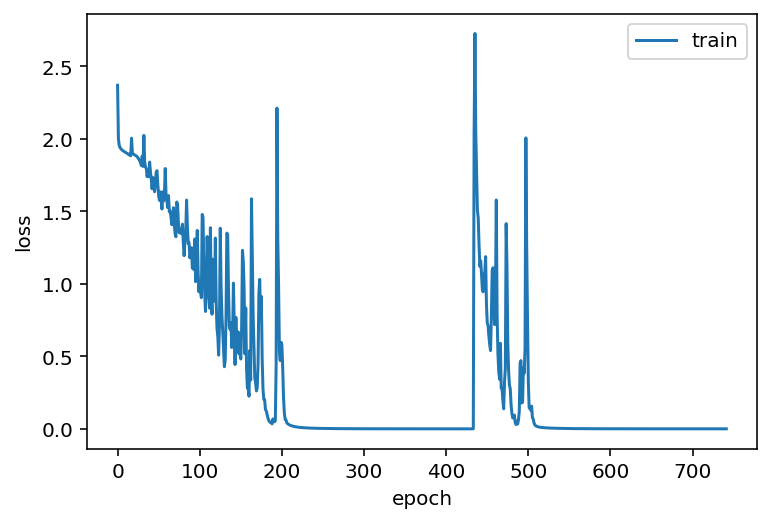

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

# 7. 모델 평가하기

In [31]:
model.evaluate(x_train, y_train, batch_size=1)
model.reset_states()

50/50 [==============================] - 1s 831us/step - loss: 9.6392e-06 - accuracy: 1.0000


# 8. 모델 사용하기

## 바로 다음 한 스텝 예측

In [32]:
x_train[0]
temp = x_train[0].reshape(1,4,1)
temp

array([[[0.84615385],
        [0.69230769],
        [0.15384615],
        [0.76923077]]])

In [33]:
idx = np.argmax(model.predict(temp))
idx

8

In [34]:
idx2code[idx]

'd8'

# 곡 전체 예측

In [35]:
pred_count = 50 # 최대 예측 갯수
seq_in = ['g8', 'c8', 'f4', 'e8']
seq_out = seq_in
seq_in = [code2idx[note] / float(max_idx_value) for note in seq_in]  # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, n_steps, n_inputs))  # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

model.reset_states()

print("full song prediction : ")

for note in seq_out:
    print(note, end=" ")

full song prediction : 
g8 c8 f4 e8 d4 c8 d8 e8 f8 g8 g8 g4 g8 e8 e8 e8 f8 d8 d4 c8 e8 g8 g8 e8 e8 e4 d8 d8 d8 d8 d8 e8 f4 e8 e8 e8 e8 e8 f8 g4 g8 e8 e4 f8 d8 d4 c8 e8 g8 g8 e8 e8 e4 d8 

In [36]:
print(seq_out)

['g8', 'c8', 'f4', 'e8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8']


In [37]:
# 나비야 초반 : 'g8', 'e8', 'e4', 'f8'
note_seq = ""
for note in seq_out:
    note_seq += note + " "
    
conv_midi = music21.converter.subConverters.ConverterMidi()

m = music21.converter.parse("2/4 " + note_seq, format='tinyNotation')

m.show("midi")